DATA SCIENCE lab evaluation : 
CB.EN.U4CSE20217

part 1

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [72]:
df=pd.read_csv("/content/advertising.csv")
df.head(4)

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5


In [73]:
df1=pd.read_csv("/content/pima-indians-diabetes.csv")
df1.head(4)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1


1a.

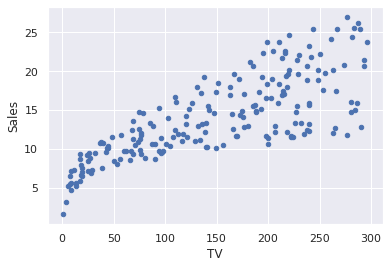

In [74]:
df.plot.scatter(x='TV',y='Sales')

1b.

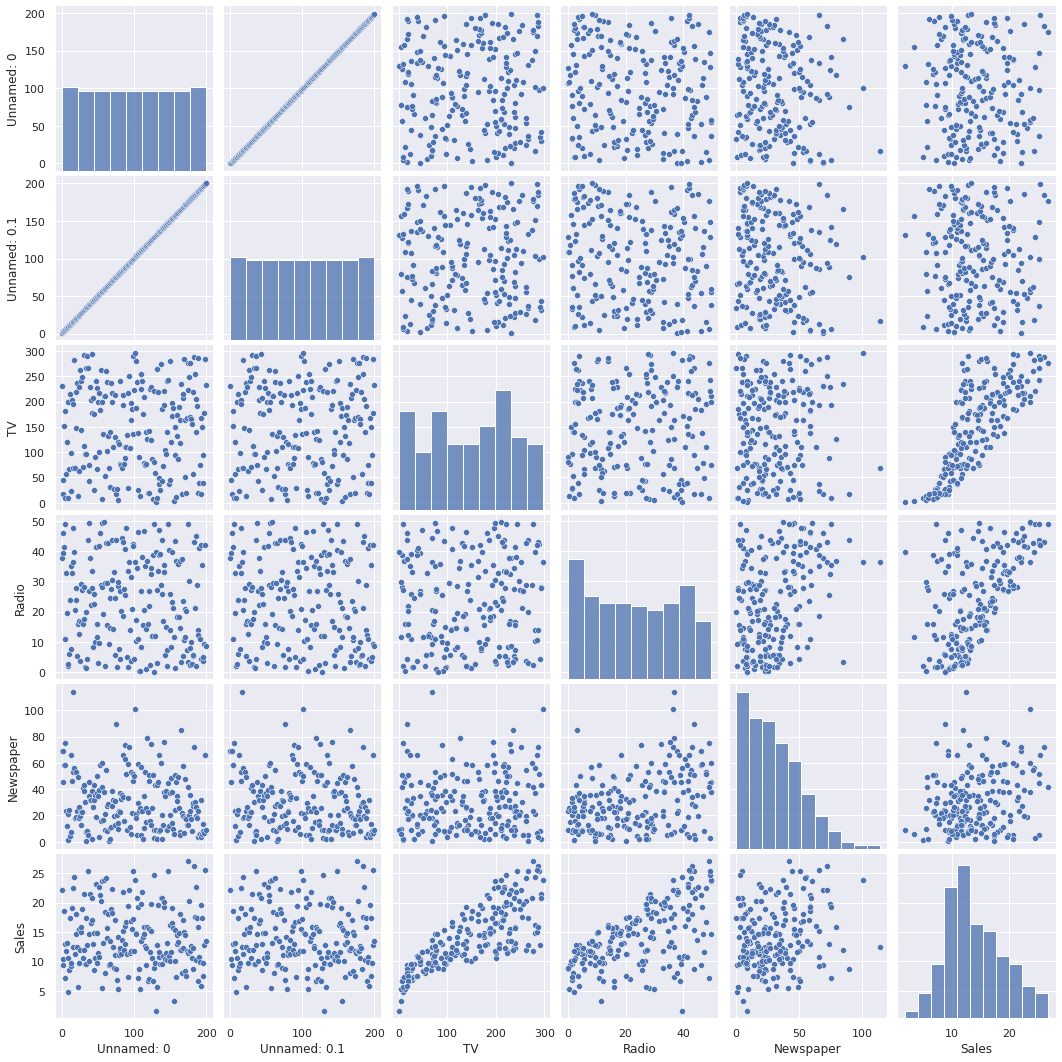

In [75]:
import seaborn as sns
sns.pairplot(df)

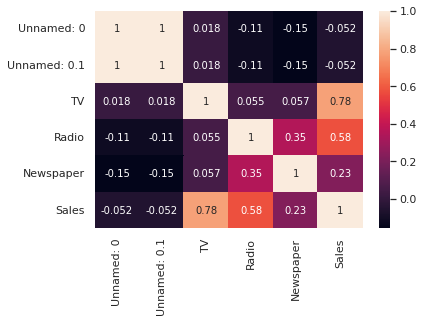

In [76]:
advertise_corr = df.corr()
sns.heatmap(advertise_corr, cbar = True, annot = True)

2.Develop a Linear Regression model based on money spent on TV advertisements versus Sales.

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [78]:
y = df[["Sales"]]
x = df[["TV"]]

In [79]:
linearreg = LinearRegression()

In [80]:
linearreg.fit(x,y)

LinearRegression()

In [81]:
print("Linear regression coefficient is: ", linearreg.coef_[0][0])

Linear regression coefficient is:  0.04753664043301975


In [82]:
print("Intercepts: ", linearreg.intercept_)

Intercepts:  [7.03259355]


3. With the regression line so developed, predict the sales that can be anticipated based on the money spent on TV advertisements

In [83]:
y_pred = linearreg.predict(x) 

Draw the Regression Line superimposing on the data

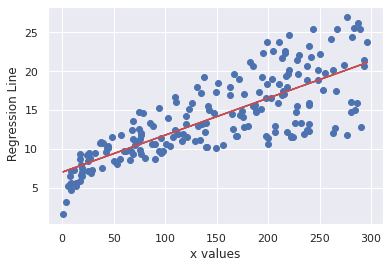

In [84]:
plt.scatter(x, y)
plt.plot(x,y_pred, 'r')
plt.xlabel("x values")
plt.ylabel(" Regression Line")
plt.show()

Employ statsmodels.api and run an OLS regressor on the data. Plot the line of regression and residuals employing libraries of statsmodel. Comment on the heteroscedasticity.

In [85]:
import statsmodels.api as sm

X = df['TV']
y = df['Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        11:07:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

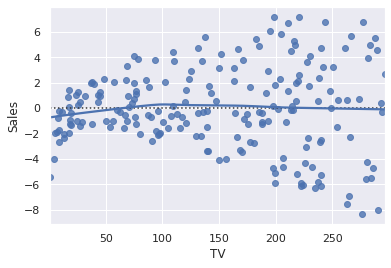

In [86]:
sns.residplot(x = "TV", 
              y = "Sales", 
              data = df, 
              lowess = True) 
  
plt.show()

Part2 (10marks). Consider the dataset "pima-indians-diabetes.csv". Label indicates the presence of diabetes(1) or its absence(0).Objective is to prepare a KNN classifier for the dataset.

Import the data set, describe the data and save it on your hard drive. Split the data for training
and testing in the ratio of 80:20.

In [87]:
df1.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [88]:
df1.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [89]:
df1.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [90]:
x1 = np.array(df1['148']).reshape(-1,1)
y1 = np.array(df1['1']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2)

Employ the standard scalar library and rescale the distribution of values so that the mean of
observed values is 0 and the standard deviation is 1.

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Develop a KNN classifier model and predict for the test data.

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predk = knn.predict(x_test)
y_predk

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

. Draw up a confusion matrix.

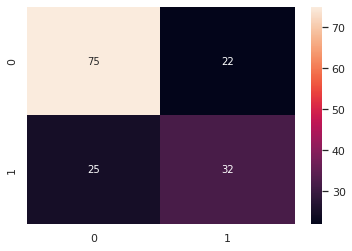

In [104]:
from sklearn.metrics import confusion_matrix
qConfusion_matrix=confusion_matrix(y_test,y_predk)
sns.heatmap(qConfusion_matrix, annot=True, fmt='g')

Identify an optimum k value based on minimum mean errors (consider a range of 20). Draw a
corresponding graph between Mean error and k-value

In [105]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
skills =df1.columns[54:87].tolist()
for i in skills:
  df1[i] = scaler.fit_transform(np.array(df1[i]).reshape(-1,1))

Text(0, 0.5, 'Mean Error')

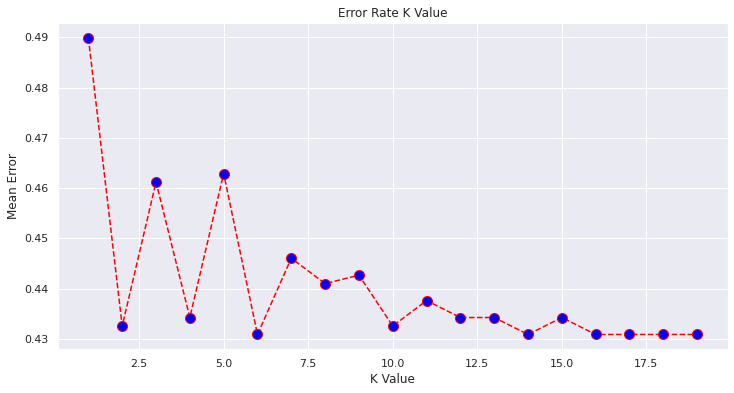

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')